In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

We will train a ConvNet for classifying images of dogs vs cats using a large dataset. Will use tensorflow's ImageDataGenerator to automatically label the data for us

In [2]:
# download dataset
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


/bin/bash: /home/tanzid/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-07-10 13:35:29--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  2.22MB/s    in 30s     

2023-07-10 13:35:59 (2.22 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# extract the compressed files and save in current directory
import zipfile

local = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local, 'r')
zip_ref.extractall()

In [2]:
import os

# specify file paths to data
base_dir = './cats_and_dogs_filtered/' 
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
print(f"Total number of cat training images: {len(os.listdir(train_cats_dir))}")
print(f"Total number of dog training images: {len(os.listdir(train_dogs_dir))}")
print(f"Total number of cat validation images: {len(os.listdir(validation_cats_dir))}")
print(f"Total number of dog validation images: {len(os.listdir(validation_dogs_dir))}")
print(os.listdir(train_dogs_dir)[:10])
print(os.listdir(validation_cats_dir)[:10])

Total number of cat training images: 1000
Total number of dog training images: 1000
Total number of cat validation images: 500
Total number of dog validation images: 500
['dog.105.jpg', 'dog.674.jpg', 'dog.356.jpg', 'dog.376.jpg', 'dog.142.jpg', 'dog.81.jpg', 'dog.1.jpg', 'dog.682.jpg', 'dog.150.jpg', 'dog.686.jpg']
['cat.2283.jpg', 'cat.2390.jpg', 'cat.2296.jpg', 'cat.2392.jpg', 'cat.2352.jpg', 'cat.2317.jpg', 'cat.2405.jpg', 'cat.2318.jpg', 'cat.2182.jpg', 'cat.2455.jpg']


Set up separate image data generators for training and validation images and preprocessing

In [11]:
target_img_height = target_img_width = 150 
color_channels = 3

# initialize data generators (normalize image pixel values)
train_datagen = ImageDataGenerator(rescale= 1.0/255.0)
validation_datagen = ImageDataGenerator(rescale= 1.0/255.0)

# create stream of image batches
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary', target_size=(target_img_height,target_img_width))

validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='binary', target_size=(target_img_height,target_img_width))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Now build and train a ConvNet model on this datset

In [14]:
model = Sequential([Conv2D(16, (3,3), activation='relu', input_shape=(target_img_height,target_img_width,color_channels)),
                    MaxPool2D(2,2),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D(2,2), 
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation ='sigmoid')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [15]:
# compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=validation_generator, epochs=15, verbose=2)

Epoch 1/15


2023-07-10 14:13:23.840078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-07-10 14:13:26.416155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 - 3s - loss: 0.6778 - accuracy: 0.5820 - val_loss: 0.6729 - val_accuracy: 0.5810 - 3s/epoch - 33ms/step
Epoch 2/15
100/100 - 2s - loss: 0.5936 - accuracy: 0.6735 - val_loss: 0.5951 - val_accuracy: 0.6800 - 2s/epoch - 20ms/step
Epoch 3/15
100/100 - 2s - loss: 0.5262 - accuracy: 0.7295 - val_loss: 0.5767 - val_accuracy: 0.7060 - 2s/epoch - 21ms/step
Epoch 4/15
100/100 - 2s - loss: 0.4426 - accuracy: 0.7875 - val_loss: 0.5875 - val_accuracy: 0.7070 - 2s/epoch - 20ms/step
Epoch 5/15
100/100 - 2s - loss: 0.3637 - accuracy: 0.8330 - val_loss: 0.5791 - val_accuracy: 0.7340 - 2s/epoch - 21ms/step
Epoch 6/15
100/100 - 2s - loss: 0.2667 - accuracy: 0.8845 - val_loss: 0.6870 - val_accuracy: 0.7210 - 2s/epoch - 24ms/step
Epoch 7/15
100/100 - 2s - loss: 0.1970 - accuracy: 0.9140 - val_loss: 0.6964 - val_accuracy: 0.7330 - 2s/epoch - 23ms/step
Epoch 8/15
100/100 - 2s - loss: 0.1126 - accuracy: 0.9600 - val_loss: 0.9706 - val_accuracy: 0.6990 - 2s/epoch - 22ms/step
Epoch 9/15
100/100 - 2s - l

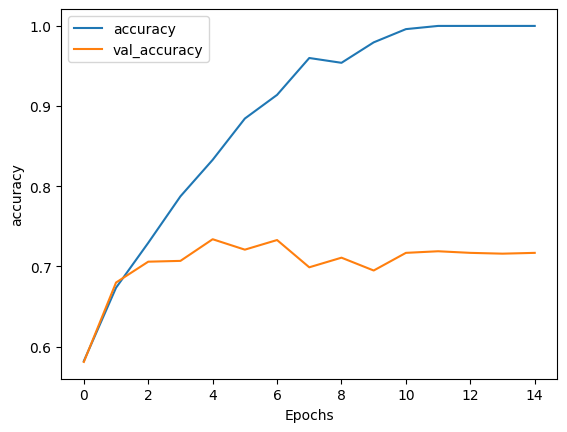

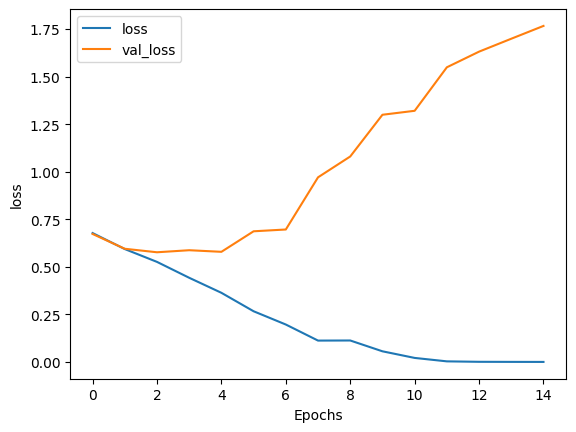

In [17]:
import matplotlib.pyplot as plt 

# lets now plot some learning curves
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_"+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_"+metric])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")